This notebook is my learning of the [tutorial](http://www.scipy-lectures.org/advanced/image_processing/index.html) by Emmanuelle Gouillart, Gaël Varoquaux

In [2]:
from scipy import ndimage

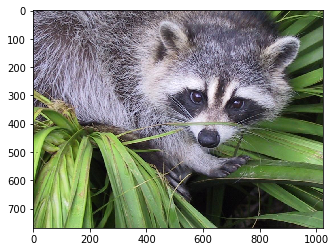

In [3]:
from scipy import misc
f = misc.face()
misc.imsave('face.png', f) # uses the Image module (PIL)

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(f)



## Basic manipulations

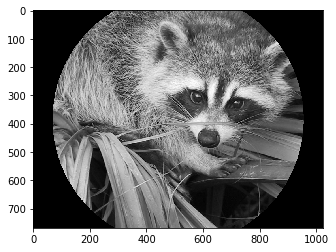

In [4]:
import numpy as np

face = misc.face(gray=True)
face[0, 40]

# Slicing
#face[10:13, 20:23]



#face[100:120] = 255

lx, ly = face.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
# Masks
face[mask] = 0
# Fancy indexing
#face[range(400), range(400)] = 255

plt.imshow(face,cmap=plt.cm.gray)

### Statistical information

In [5]:
face = misc.face(gray=True)
np.median(face), face.mean(), face.max(), face.min()

(115.0, 113.48026784261067, 250, 0)

In order to plot histogram, it is necessary to turn the 2D image array into a 1D array, by reshape(-1) function.

(array([  55886.,   61750.,   84167.,  112754.,  127645.,  119790.,
         104124.,   80793.,   34539.,    4984.]),
 array([   0.,   25.,   50.,   75.,  100.,  125.,  150.,  175.,  200.,
         225.,  250.]),
 <a list of 10 Patch objects>)

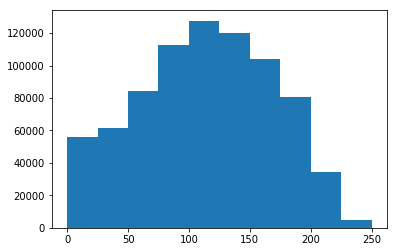

In [6]:
plt.hist(face.reshape(-1))

### Geometric transforms

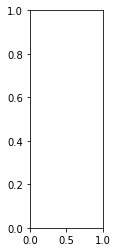

In [15]:
face = misc.face(gray=True)
lx, ly = face.shape
# Cropping
crop_face = face[lx // 4: - lx // 4, ly // 4: - ly // 4]
# up <-> down flip
flip_ud_face = np.flipud(face)
# rotation
rotate_face = ndimage.rotate(face, 45)
rotate_face_noreshape = ndimage.rotate(face, 45, reshape=False)

plt.figure(1)

plt.subplot(141)
plt.imshow(crop_face, cmap=plt.cm.gray); 
plt.axis('off')

plt.subplot(142)
plt.imshow(flip_ud_face, cmap=plt.cm.gray); 
plt.axis('off')

plt.subplot(143)
plt.imshow(rotate_face, cmap=plt.cm.gray); 
plt.axis('off')

plt.subplot(144)
plt.imshow(rotate_face_noreshape, cmap=plt.cm.gray); 
plt.axis('off')



## Image filtering

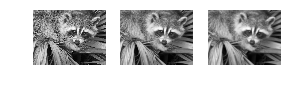

In [19]:
from scipy import misc
face = misc.face(gray=True)
blurred_face = ndimage.gaussian_filter(face, sigma=3)
very_blurred = ndimage.gaussian_filter(face, sigma=5)

plt.figure(2)
plt.subplot(141)
plt.imshow(face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(142)
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(143)
plt.imshow(very_blurred, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

### Denoising

In [ ]:
from scipy import misc
f = misc.face(gray=True)
f = f[230:290, 220:320]
noisy = f + 0.4 * f.std() * np.random.random(f.shape)